In [21]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import math
%matplotlib inline
import xgboost as xgb
from sklearn.tree import export_graphviz
import graphviz,re
from xgboost import XGBRegressor
from skforecast.ForecasterAutoreg import ForecasterAutoreg

In [22]:
np.random.randn(1)
n=365*11

In [23]:
linear,trend,seasonality,noise=[],[],[],[]
for i in range(n):
    linear.append(1)
    trend.append((i**1)*0.001)
    seasonality.append(1.2*math.sin(math.pi*i*2/365))  ## 1 year as a cycle
   
    
linear=np.array(linear)
trend=np.array(trend)
seasonality=np.array(seasonality)
noise = (np.random.randn(n)).reshape(-1)*0.3

Text(0.5, 1.0, 'noise')

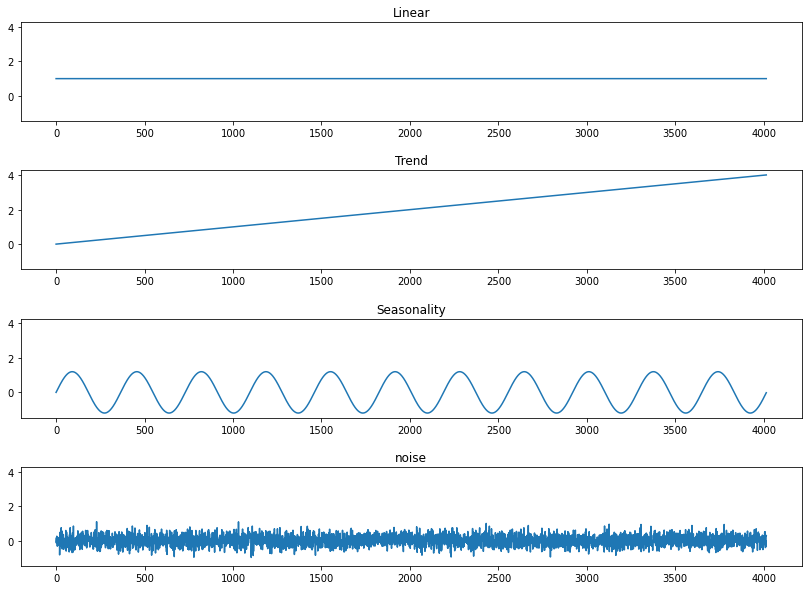

In [24]:
f, (ax1, ax2, ax3, ax4) = plt.subplots(4,1, sharey=True,figsize=(14,10))
f.subplots_adjust(hspace=0.5)
ax1.plot(np.arange(n),linear)
ax2.plot(np.arange(n),trend)
ax3.plot(np.arange(n),seasonality)
ax4.plot(np.arange(n),noise)
ax1.set_title('Linear')
ax2.set_title('Trend')
ax3.set_title('Seasonality')
ax4.set_title('noise')

In [25]:
y=linear+trend+seasonality+noise
x=np.arange(n)

In [26]:
# y=y.reshape(-1,1)
x=x.reshape(-1,1)

Text(0.5, 1.0, 'Fake Data')

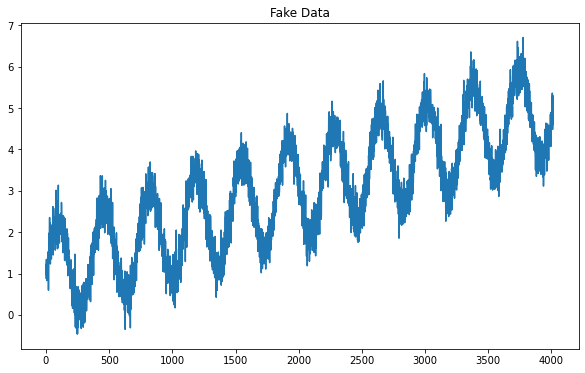

In [27]:
plt.figure(figsize=(10,6))
plt.plot(x,y)
plt.title('Fake Data')

In [28]:
n_valid = 365*4
idx = np.random.random_integers(10)
idx =np.arange(n)
train_idx = idx[:-n_valid]
valid_idx = idx[-n_valid:]
x_train = x[train_idx]
x_valid = x[valid_idx]
y_train = y[train_idx]
y_valid = y[valid_idx]

C:\Users\adity\AppData\Local\Temp\ipykernel_19640\1387660041.py:2: DeprecationWarning: This function is deprecated. Please call randint(1, 10 + 1) instead
  idx = np.random.random_integers(10)


In [29]:
x_train=pd.DataFrame(x_train,columns=['Date'])
x_valid=pd.DataFrame(x_valid,columns=['Date'])

In [64]:
forecaster = ForecasterAutoreg(
                regressor = XGBRegressor(random_state=123, max_depth=5),
                lags = 600
                )

# print(y_train.shape)
# X, y = forecaster.create_train_X_y(pd.Series(y_train), x_train)
forecaster.fit(y = pd.Series(y_train), exog = x_train)
y_pred = forecaster.predict(steps = len(y_valid), exog = x_valid)

# forecaster.fit(x_train, y_train)
# m2 = XGBRegressor(max_depth=5)
# m2.fit(x_train,y_train)
# m2_predict = m2.predict(x_valid).reshape(-1,1)

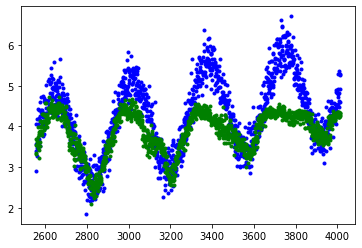

In [65]:
plt.plot(valid_idx,y_valid,'b.')
plt.plot(valid_idx, y_pred,'g.')